In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
print("libs complete")

libs complete


In [226]:
#get labels as a df
labels = pd.read_csv("data/labels.csv")
print(f"Labels Shape: {labels.shape}")
#load images
images = np.load('data/images.npy')
print(f"Images Shape: {images.shape}")

Labels Shape: (4750, 1)
Images Shape: (4750, 128, 128, 3)


In [227]:
print(labels.columns)

Index(['Label'], dtype='object')


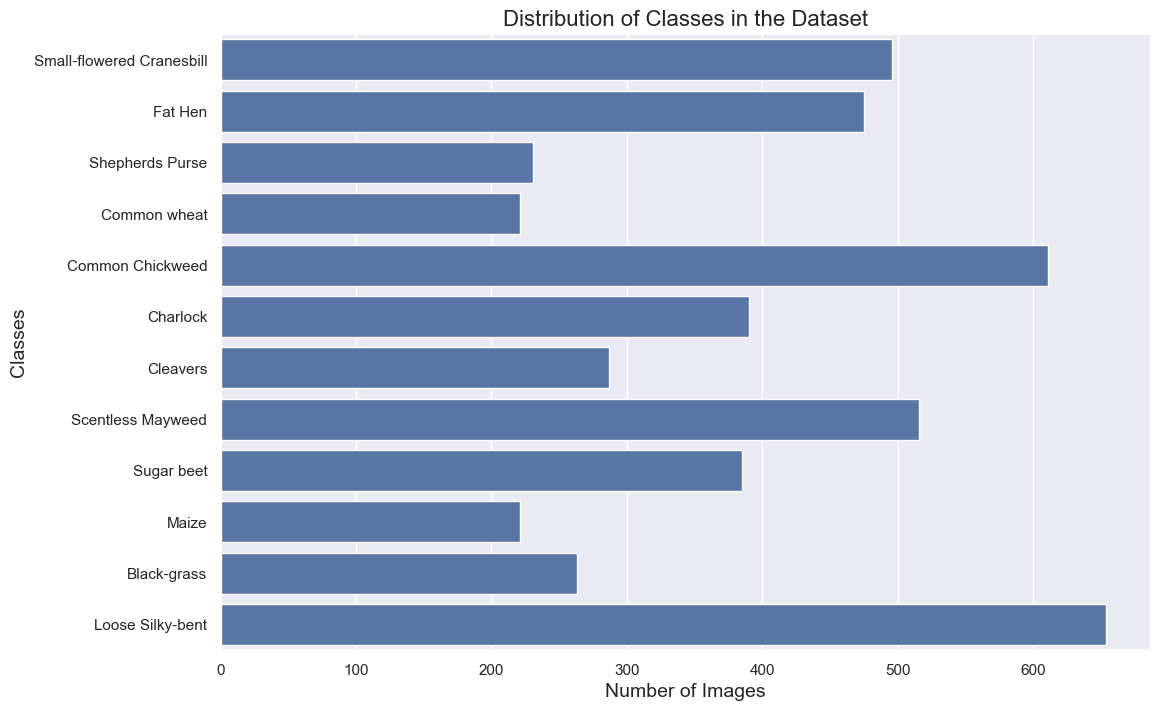

In [228]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.countplot(y='Label', data=labels, legend=False)
plt.title('Distribution of Classes in the Dataset', fontsize=16)
plt.ylabel('Classes', fontsize=14)
plt.xlabel('Number of Images', fontsize=14)
plt.show()

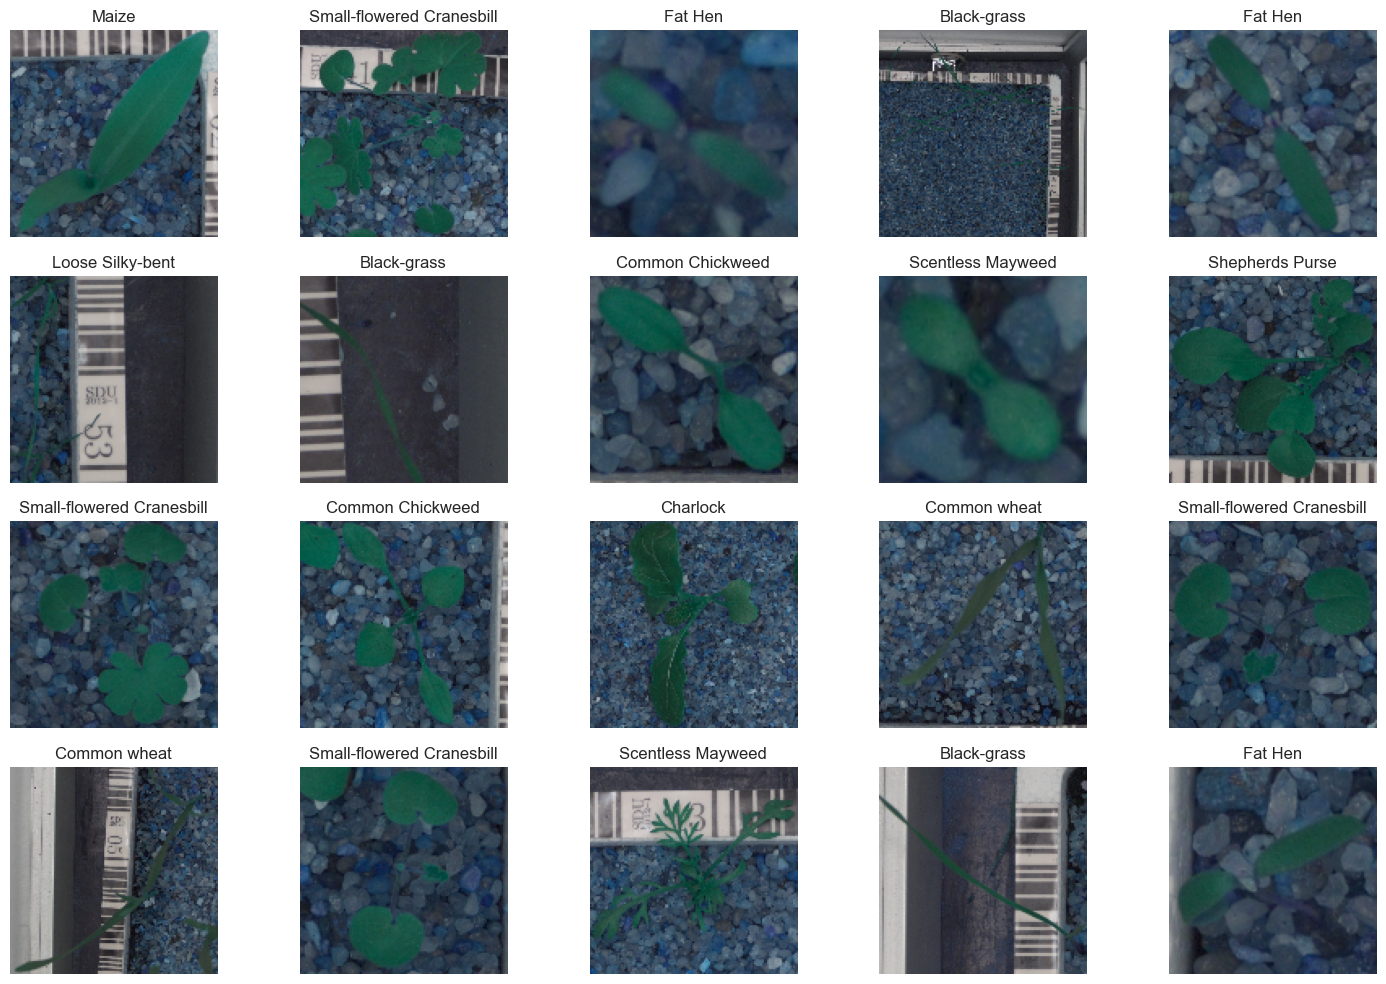

In [229]:
num_samples = 20
images_per_row = 5
num_rows = 4
#randomize
random_indices = np.random.choice(images.shape[0], num_samples, replace=False)

plt.figure(figsize=(15, 10))
#loop for a sample of images with their labels
for i in range(num_samples):
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(images[random_indices[i]])
    plt.title(labels['Label'].iloc[random_indices[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [230]:
#ENCODING FOR THE LABELS 0-1
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels['Label'])
#NORMALIZATION OF IMAGES
#255 TO COVER THE MAX INTENSITY OF COLORS
images = images / 255.0

In [231]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [232]:
#data augmentation
augment = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#fit it to images
augment.fit(X_train)
print("augmentation complete")

augmentation complete


In [233]:
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\X_train.npy", X_train)
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\X_test.npy", X_test)
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\X_val.npy", X_val)
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\y_train.npy", y_train)
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\y_test.npy", y_test)
np.save(r"C:\Users\tyler\OneDrive - SNHU\WGU\Neural Networks\Task 1\y_val.npy", y_val)

In [234]:
#neural network model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

#Compile model and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │      29,491,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,517,260 (112.60 MB)

 Trainable params: 29,517,260 (112.60 MB)

 Non-trainable params: 0 (0.00 B)

In [235]:
#Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, min_lr=0.001)

#tune the learning rate
optimizer = SGD(learning_rate=0.001, momentum=0.9)
#Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.1297 - loss: 2.4470 - val_accuracy: 0.2013 - val_loss: 2.3943 - learning_rate: 0.0010
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.1784 - loss: 2.3826 - val_accuracy: 0.2816 - val_loss: 2.3253 - learning_rate: 0.0010
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.2271 - loss: 2.2838 - val_accuracy: 0.3132 - val_loss: 2.1562 - learning_rate: 0.0010
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.3067 - loss: 2.1291 - val_accuracy: 0.3724 - val_loss: 1.9199 - learning_rate: 0.0010
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.3552 - loss: 1.8885 - val_accuracy: 0.4118 - val_loss: 1.7499 - learning_rate: 0.0010
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.3986 - loss: 1.7242 - val_accuracy: 0.4618 - val_loss: 1.5737 - learning_rate: 0.0010
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.4686 - loss: 1.

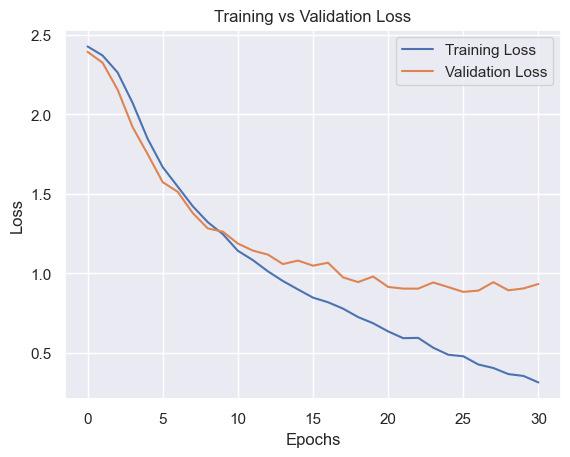

In [236]:
#loss values
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the losses
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


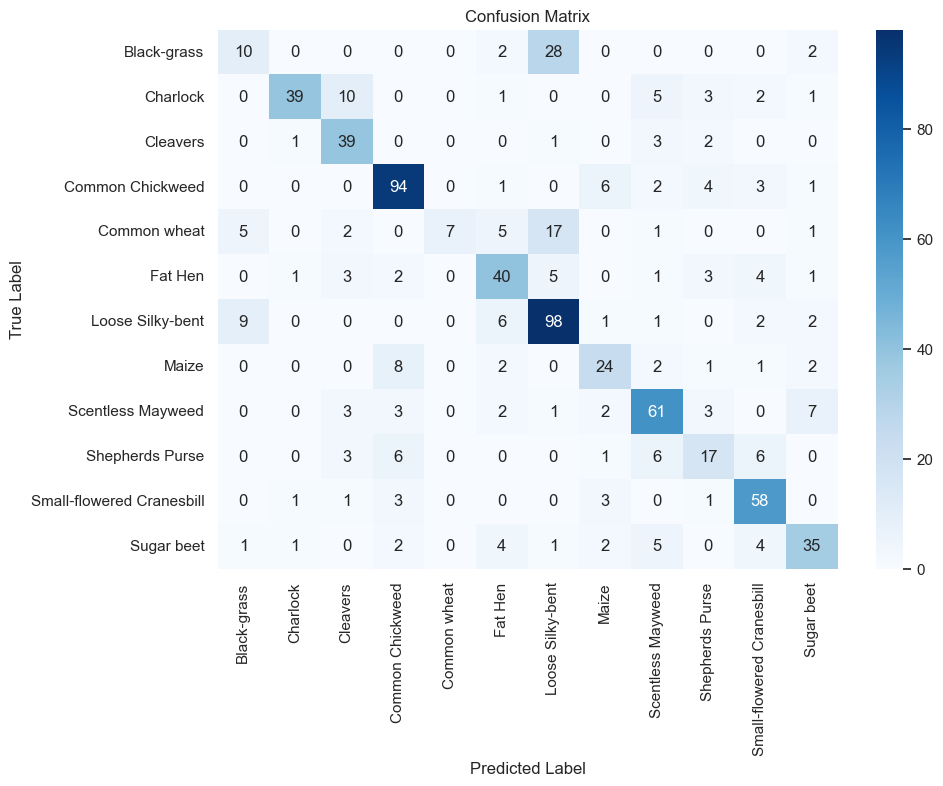

In [237]:
y_pred_prob = model.predict(X_val)
y_pred_classes = np.argmax(y_pred_prob, axis=-1)
cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [241]:
#save the model
model.save(f'C:/Users/tyler/OneDrive - SNHU/WGU/Neural Networks/Task 1/Task1_CNN.keras')